# Graded Project 3 -Python for DS
# Group - G1S1

### Model Building and saving the model using Pickle

##### 1. Import required libraries and read the dataset. (2)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
df = pd.read_csv('loan_approval_data.csv')

##### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features. (2)


In [3]:
# checking first 5 samples of dataset
df.head(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [4]:
## checking the shape
df.shape

(614, 13)

In [5]:
## checking basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


- We can obserbe that there are 13 columns in dataset with maximum 614 entries in each column. 
- Missing values were observed in 7 columns
- Of 13 columns, 5 are of float datatype, 1 is of int datatype and 7 are of object datatype

##### 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. (2)


In [6]:
# checking number of duplicate records
len(df[df.duplicated()])

0

- no duplicate records are observed in dataset

In [7]:
# checking for missing values
df.isnull().sum()/len(df)*100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

- Missing values are observed in columns 'gender'(2.11%) , 'married' (0.48%), 'dependants' (2.44%), 'self_eployed'(5.21%), 'loanamount'(3.58%), 'loan_amount_term' (2.28%) and 'credit_history' (8.14%)

For treating the missing values, we use following methods:
- The missing values in numerical columns are replaced with the median of their column
- The missing values in categorical columns are replaced with mode of their respective columns

In [8]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
print('Numerical Columns = ' , numerical_columns)
print('Categorical Columns= ' , categorical_columns)

Numerical Columns =  ['dependents', 'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history']
Categorical Columns=  ['loan_id', 'gender', 'married', 'education', 'self_employed', 'property_area', 'loan_status']


In [9]:
df[numerical_columns] = df[numerical_columns].apply(lambda x: x.fillna(x.median()))

df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [10]:
# checking for missing values after treatment
df.isnull().sum()/len(df)*100

loan_id              0.0
gender               0.0
married              0.0
dependents           0.0
education            0.0
self_employed        0.0
applicantincome      0.0
coapplicantincome    0.0
loanamount           0.0
loan_amount_term     0.0
credit_history       0.0
property_area        0.0
loan_status          0.0
dtype: float64

In [11]:
# dropping redundant features
df.drop(['loan_id'],axis=1, inplace=True)

In [12]:
# checking dataset after preprocessing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             614 non-null    object 
 1   married            614 non-null    object 
 2   dependents         614 non-null    float64
 3   education          614 non-null    object 
 4   self_employed      614 non-null    object 
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    float64
 7   loanamount         614 non-null    float64
 8   loan_amount_term   614 non-null    float64
 9   credit_history     614 non-null    float64
 10  property_area      614 non-null    object 
 11  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


##### 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations. (2)

<Axes: xlabel='gender'>

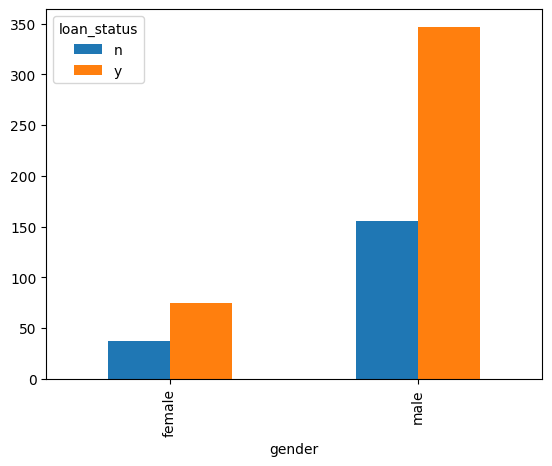

In [13]:
# visualizing 'loan_status' with respect to 'gender'
pd.crosstab(df['gender'],df['loan_status']).plot(kind='bar')

- It can be observed loan approval rate was higher in males when compared to females

<Axes: xlabel='married'>

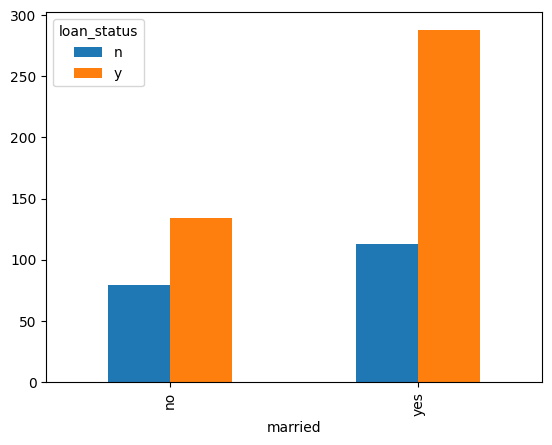

In [14]:
# visualizing 'loan_status' with respect to 'married'
pd.crosstab(df['married'],df['loan_status']).plot(kind='bar')

- most of the loan applications were made by married individuals
- The frequency of loan rejections was more incase of non-married individuals and lesser in married individuals

<Axes: xlabel='education'>

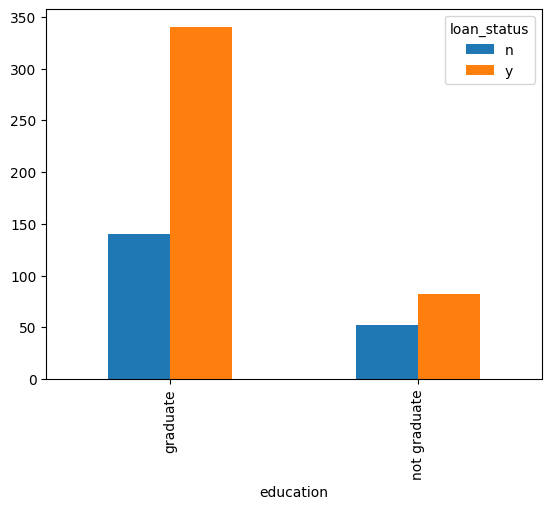

In [15]:
# visualizing 'loan_status' with respect to 'education'
pd.crosstab(df['education'],df['loan_status']).plot(kind='bar')

- most of the loan approvals were made for graduate individuals.
- The frequency of loan rejections was more incase of non-graduate individuals.

<Axes: xlabel='self_employed'>

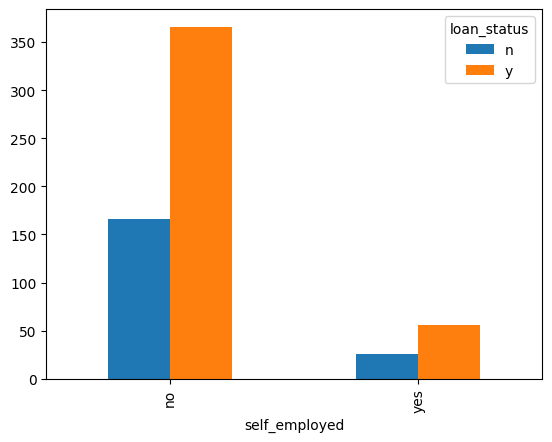

In [16]:
# visualizing 'loan_status' with respect to 'self_employed'
pd.crosstab(df['self_employed'],df['loan_status']).plot(kind='bar')

- more frequency of loan approval was in case of non self employed people. lesser frequency of loan applications were observed in people who were self-employed.

<Axes: xlabel='property_area'>

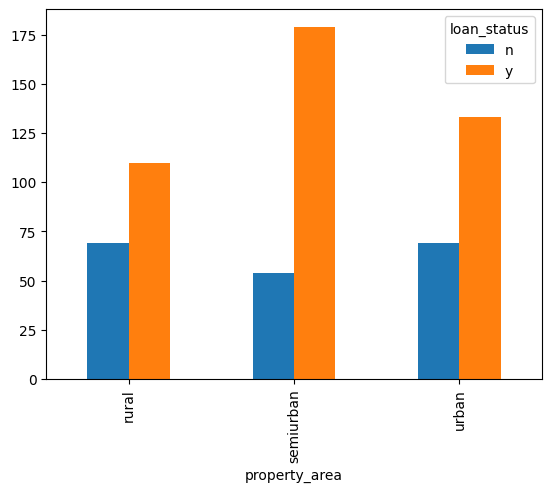

In [17]:
# visualizing 'loan_status' with respect to 'property_area'
pd.crosstab(df['property_area'],df['loan_status']).plot(kind='bar')

- Highest frequency of loan approval was observed incase of semi-urban property types
- Highest frequency of loan rejections were observed in cases of rural properties

##### 5. Encode the categorical data. (2)


In [18]:
df['gender'].unique()

array(['male', 'female'], dtype=object)

In [19]:
df['married'].unique()

array(['no', 'yes'], dtype=object)

In [20]:
df['education'].unique()

array(['graduate', 'not graduate'], dtype=object)

In [21]:
df['self_employed'].unique()

array(['no', 'yes'], dtype=object)

In [22]:
df['property_area'].unique()

array(['urban', 'rural', 'semiurban'], dtype=object)

In [23]:
df['loan_status'].unique()

array(['y', 'n'], dtype=object)

In [24]:
## Manual encoding:
df['gender'] = df['gender'].replace({'male':0, 'female':1})
df['married'] = df['married'].replace({'no':0, 'yes':1})
df['education'] = df['education'].replace({'graduate':0, 'not graduate':1})
df['self_employed'] = df['self_employed'].replace({'no':0, 'yes':1})
df['property_area'] = df['property_area'].replace({'urban':0, 'rural':1, 'semiurban':2})

In [25]:
# checking data after encoding
df['gender'].unique()

array([0, 1], dtype=int64)

In [26]:
df['married'].unique()

array([0, 1], dtype=int64)

In [27]:
df['education'].unique()

array([0, 1], dtype=int64)

In [28]:
df['self_employed'].unique()

array([0, 1], dtype=int64)

In [29]:
df['property_area'].unique()

array([0, 1, 2], dtype=int64)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             614 non-null    int64  
 1   married            614 non-null    int64  
 2   dependents         614 non-null    float64
 3   education          614 non-null    int64  
 4   self_employed      614 non-null    int64  
 5   applicantincome    614 non-null    int64  
 6   coapplicantincome  614 non-null    float64
 7   loanamount         614 non-null    float64
 8   loan_amount_term   614 non-null    float64
 9   credit_history     614 non-null    float64
 10  property_area      614 non-null    int64  
 11  loan_status        614 non-null    object 
dtypes: float64(5), int64(6), object(1)
memory usage: 57.7+ KB


##### 6. Separate the target and independent features and split the data into train and test. (2)

In [31]:
X = df.drop('loan_status', axis=1)
y = df['loan_status']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(429, 11) (185, 11)
(429,) (185,)


##### 7. Build any classification model to predict the loan status of the customer and save your model using pickle. (3)

In [33]:
# Build a Logistic Regressor model
lr = LogisticRegression() 

# Fit the model to the training data
lr.fit(X_train, y_train)

LogisticRegression()

In [34]:
# Predict on the training and testing data
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

accuracy_train = accuracy_score(y_train,y_train_pred)
accuracy_test = accuracy_score(y_test,y_test_pred)

print('accuracy train:',accuracy_train)
print('accuarcy test',accuracy_test)

accuracy train: 0.8018648018648019
accuarcy test 0.8324324324324325


In [35]:
# creating and saving a pickle file
import pickle
# Saving model to disk
pickle.dump(lr, open('model.pkl','wb'))